In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as MSE


In [4]:
df = pd.read_csv("../Data/daily-total-female-births-in-cal.csv", parse_dates=['Date'], index_col=['Date'])
df.head()


,births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


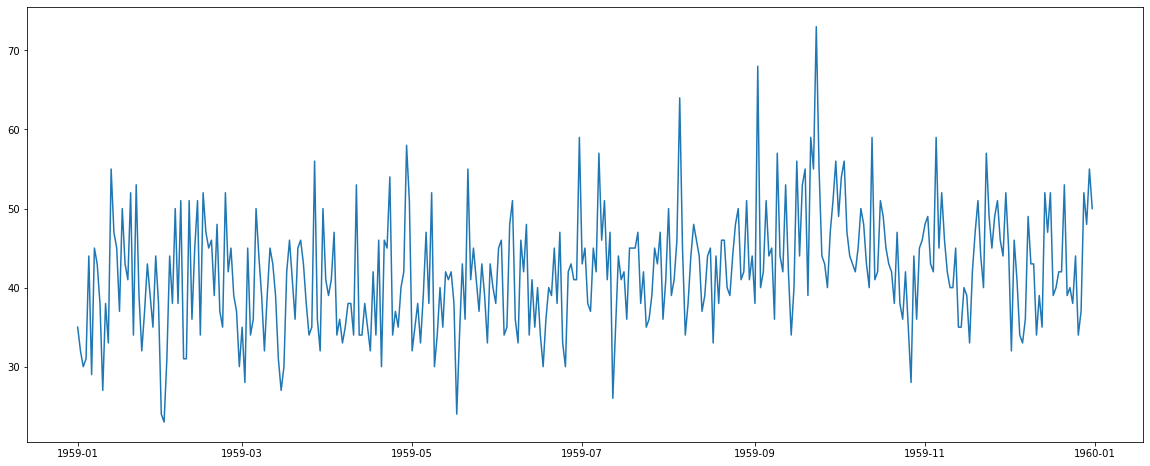

In [6]:
plt.figure(figsize=(20,8))
plt.plot(df)

In [113]:
trainSize = int(0.98 * len(df))
train = df[0:trainSize]
test = df[trainSize:]

train.shape, test.shape


((357, 1), (8, 1))

In [125]:
# ARIMA Model
p=4
i=1
q=3
model = ARIMA(endog=train, order=(p, i, q))
model_fit = model.fit()
train_predictions = model_fit.predict()
# train_predictions = pd.DataFrame(train_predictions, index=train.index, columns=['pred_reading'])
train_predictions.head()
# print("\n\nMean Squared Error: ", MSE(train, train_predictions))


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

1959-01-02    0.018863
1959-01-03    1.419650
1959-01-04    2.153511
1959-01-05    0.850838
1959-01-06   -8.397437
Freq: D, dtype: float64

In [ ]:
test_predictions, standard_error, conf_int = model_fit.forecast(len(test), alpha=0.05)  # 95% conf
test_predictions = pd.DataFrame(test_predictions, index=test.index.values, columns=['pred_reading'])

print("Mean Squared Error: ", MSE(test_predictions, test))
test_predictions.head()

Mean Squared Error:  57.61569058074911


,pred_reading
1959-12-24,41.508829
1959-12-25,42.572682
1959-12-26,42.808099
1959-12-27,42.456438
1959-12-28,42.287890


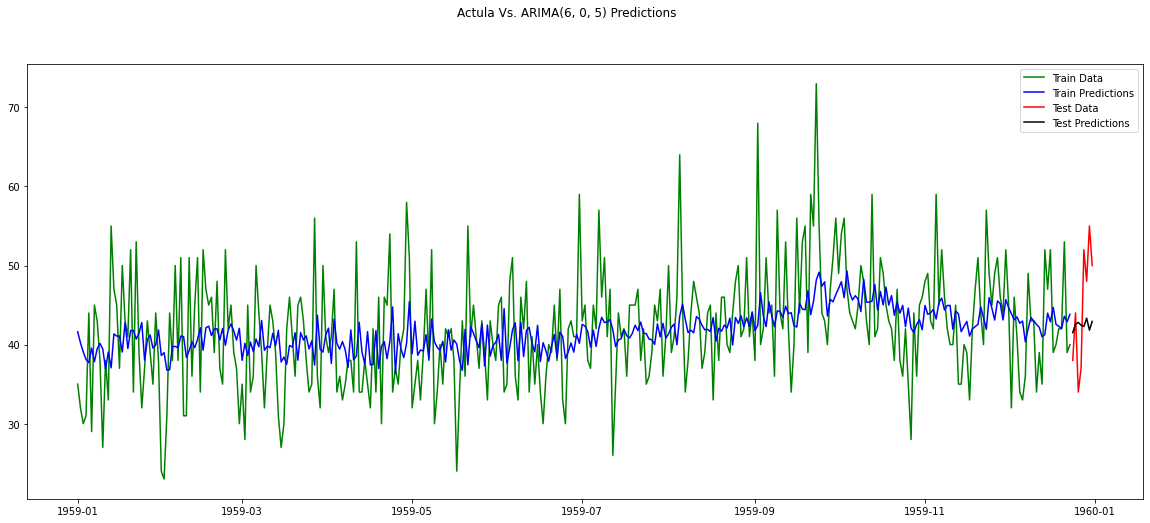

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(train, c='green', label="Train Data")
plt.plot(train_predictions, c='blue', label="Train Predictions")
plt.plot(test, c='red', label="Test Data")
plt.plot(test_predictions, c='black', label="Test Predictions")
plt.legend()
plt.suptitle(f"Actula Vs. ARIMA({p}, {i}, {q}) Predictions")
plt.show()